In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

## Ex. 3.3

In [2]:
def f(x):
    return 4*np.sqrt(1-x**2)

In [3]:
mean = []
var = []
for y in range(1000):
    for x in range(1000):
        mean.append(f(np.random.uniform()))
    var.append(sum(mean) / len(mean))

In [4]:
avg = sum(var) / len(var)
sd = np.sqrt(sum([(x - avg)**2 for x in var]) / len(var)**2)

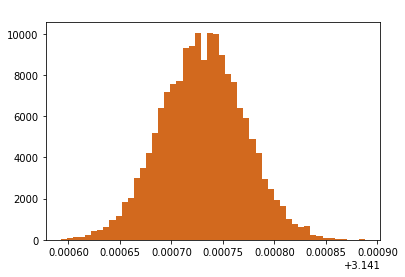

In [5]:
plt.hist([np.random.normal(avg,sd) for x in range(10000)],bins = 50,density=True,color="chocolate")
plt.title("Approximation of \u03C0 Using Monte Carlo Integration", loc="left",c="white")
plt.show()

In [6]:
print("Average value for \u03C0: "+ str(round(avg,6)))
print("95% Confidence Interval for \u03C0: (" + str(round(avg - 2*sd, 6)) + ", " + str(round(avg + 2*sd, 6)) + ")")

Average value for π: 3.141731
95% Confidence Interval for π: (3.14165, 3.141812)


## Example 3.4

In [7]:
## Normal Distribution CDF Calculator Using Monte Carlo Integration
def f(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*(x**2))

In [30]:
def norm_cdf(x):
    I = 0
    N = 10**5
    for t in range(N):
        if st.norm.rvs() < x:
            I += 1
    return I / N

In [32]:
%%time 
norm_cdf(0.5)

CPU times: user 3.02 s, sys: 306 ms, total: 3.33 s
Wall time: 3.09 s


0.69156

## Exercise 3.3

In [83]:
## The Goal
st.norm.sf(20)

2.7536241186061556e-89

In [84]:
def h(x):
    return (1/np.sqrt(2*np.pi))*(1/(20*(x**2)))*np.exp(-0.5*(x**-2))

In [85]:
%%time
N = 10**5
U = []
for trial in range(N):
    U.append(h(np.random.uniform(0,1/20)))
avg = sum(U) / N
avg

CPU times: user 482 ms, sys: 3.05 ms, total: 485 ms
Wall time: 484 ms


2.765509783703771e-89

In [86]:
err = np.sqrt(sum([(x - avg)**2 for x in U])) / N
err

1.2661685897059862e-90